<a href="https://colab.research.google.com/github/Auliaafnc/Artificial-Intelligence/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset berhasil dimuat.
Informasi Awal Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Jumlah Nilai Kosong:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating       

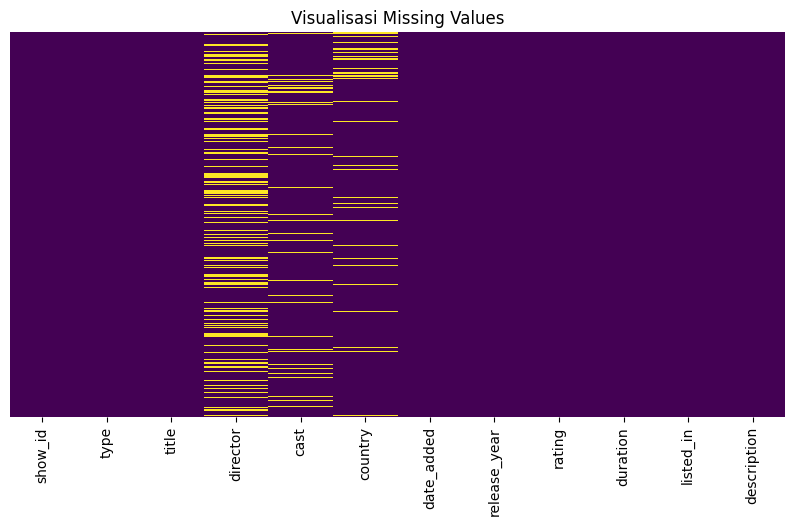

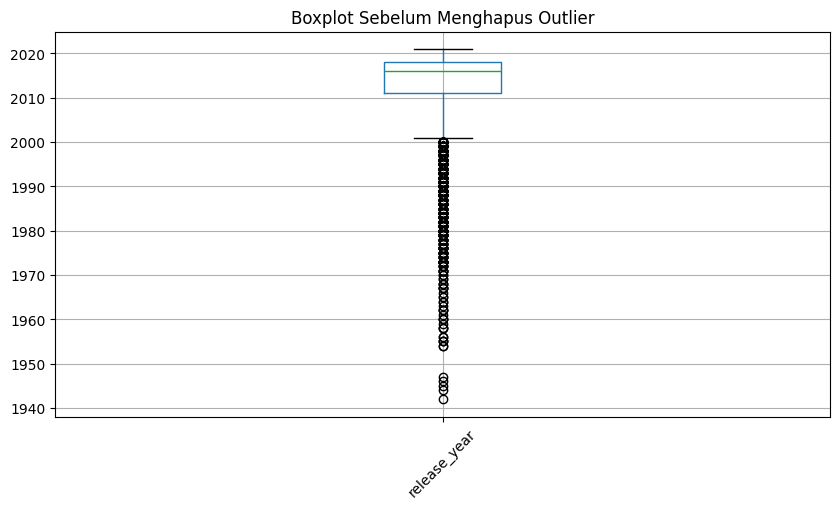

<ipython-input-28-4232ec9b5b8a>:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.   1.   1.   ... 0.4  0.25 0.7 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, kolom_numerik] = skala.fit_transform(df[kolom_numerik].astype(float))
<ipython-input-28-4232ec9b5b8a>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].astype(str).str.extract(r'(\d+)')
<ipython-input-28-4232ec9b5b8a>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

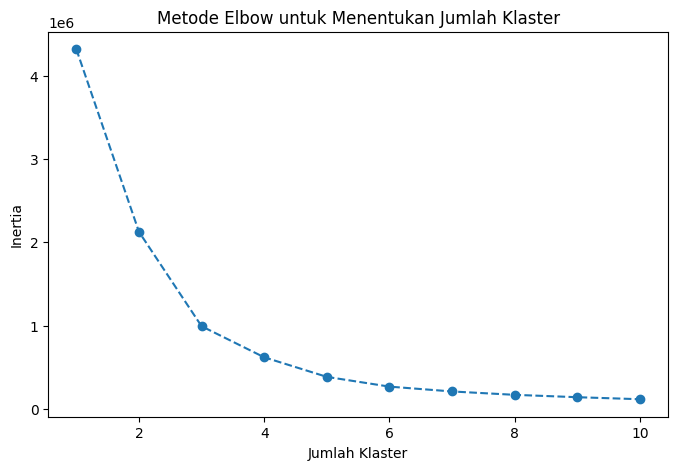

Evaluasi Model Logistic Regression dengan KMeans:
Akurasi: 1.00
Presisi: 1.00
Recall: 1.00
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       491

    accuracy                           1.00       972
   macro avg       1.00      1.00      1.00       972
weighted avg       1.00      1.00      1.00       972



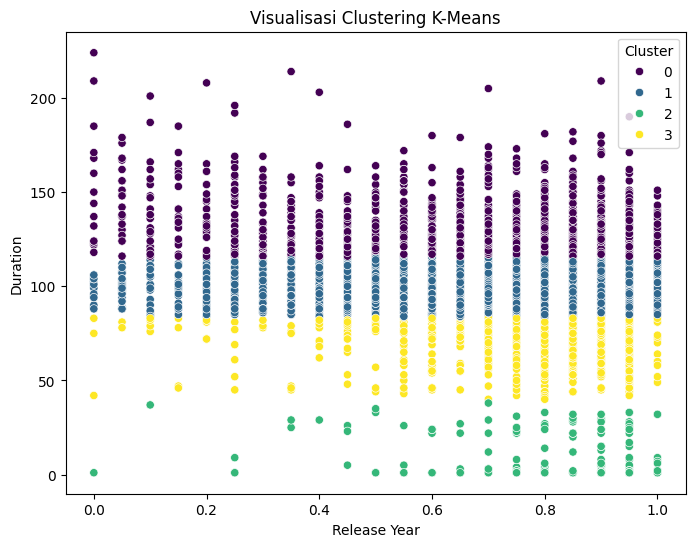

Evaluasi Kinerja Model:
Pengoptimalan Hyperparameter dengan GridSearchCV
Perbandingan Hasil Model Dengan dan Tanpa Clustering

Evaluasi dan Pengoptimalan Model

Evaluasi Model: Menggunakan KMeans
Akurasi: 1.00
Presisi: 1.00
Recall: 1.00
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       491

    accuracy                           1.00       972
   macro avg       1.00      1.00      1.00       972
weighted avg       1.00      1.00      1.00       972


Evaluasi Model: Menggunakan KMeans dan Logistic Regression
Akurasi: 1.00
Presisi: 1.00
Recall: 1.00
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       491

    accuracy                           1.00       972
   macro avg       1.00      1.00      1.00       972
weighted avg       1.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import os
from google.colab import files

# Langkah 1: Preprocessing Data

# Unggah dataset terlebih dahulu jika tidak tersedia
file_path = 'netflix_titles.csv'
if not os.path.exists(file_path):
    print("File tidak ditemukan. Silakan unggah dataset.")
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]

try:
    # Memuat dataset
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat.")

    # Menampilkan informasi awal dataset
    print("Informasi Awal Dataset:")
    df.info()
    print("\nJumlah Nilai Kosong:")
    print(df.isnull().sum())

    # Visualisasi missing values
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
    plt.title('Visualisasi Missing Values')
    plt.show()

    # Menangani nilai yang hilang
    df.dropna(inplace=True)  # Hapus baris dengan nilai yang hilang

    # Menangani outlier (untuk kolom numerik)
    kolom_numerik = df.select_dtypes(include=[np.number]).columns

    if not kolom_numerik.empty:
        plt.figure(figsize=(10, 5))
        df[kolom_numerik].boxplot()
        plt.title("Boxplot Sebelum Menghapus Outlier")
        plt.xticks(rotation=45)
        plt.show()

        for kolom in kolom_numerik:
            Q1 = df[kolom].quantile(0.25)
            Q3 = df[kolom].quantile(0.75)
            IQR = Q3 - Q1
            batas_bawah = Q1 - 1.5 * IQR
            batas_atas = Q3 + 1.5 * IQR
            df = df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]

    # Normalisasi data
    if not df.empty and not kolom_numerik.empty:
        skala = MinMaxScaler()
        df.loc[:, kolom_numerik] = skala.fit_transform(df[kolom_numerik].astype(float))


   # Konversi kolom 'duration' ke format numerik
    df['duration'] = df['duration'].astype(str).str.extract(r'(\d+)')
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')


    # Langkah 2: Clustering

    # 1. Pilih algoritma clustering (K-Means)
    fitur_clustering = ['release_year', 'rating', 'duration']
    data_clustering = df_terpilih[fitur_clustering]

    # 2. Tentukan jumlah klaster (K) menggunakan metode Elbow
    distorsi = []
    rentang_K = range(1, 11)
    for k in rentang_K:
        kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_test.fit(data_clustering)
        distorsi.append(kmeans_test.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(rentang_K, distorsi, marker='o', linestyle='--')
    plt.xlabel('Jumlah Klaster')
    plt.ylabel('Inertia')
    plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
    plt.show()

    # 3. Jalankan algoritma clustering
    K = 4  # Sesuaikan berdasarkan elbow method
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    df_terpilih['Cluster'] = kmeans.fit_predict(data_clustering)

    # 4. Simpan hasil klaster ke dalam dataset
    df_terpilih.to_csv('netflix_titles_clustered.csv', index=False)


    # Langkah 3: Penggabungan dengan Machine Learning

    # 1. Pilih model machine learning (logistic regression)
    model = LogisticRegression()

    # 2. Gunakan hasil klaster sebagai fitur tambahan
    df_terpilih['Cluster'] = kmeans.fit_predict(data_clustering)

    # 3. Latih model machine learning
    X_train, X_test, y_train, y_test = train_test_split(df_terpilih[['release_year', 'rating', 'duration', 'Cluster']],
                                                        (df_terpilih['release_year'] > df_terpilih['release_year'].median()).astype(int),
                                                        test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    # 4. Evaluasi kinerja model
    y_pred = model.predict(X_test)
    print("Evaluasi Model Logistic Regression dengan KMeans:")
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Presisi: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

    # Menggunakan hasil clustering sebagai fitur tambahan dalam model
    df_terpilih['Cluster'] = kmeans.fit_predict(data_clustering)

    # Visualisasi hasil clustering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_terpilih['release_year'], y=df_terpilih['duration'], hue=df_terpilih['Cluster'], palette='viridis')
    plt.xlabel('Release Year')
    plt.ylabel('Duration')
    plt.title('Visualisasi Clustering K-Means')
    plt.legend(title='Cluster')
    plt.show()

    # Langkah 4: Evaluasi dan Pengoptimalan

    # 1. Evaluasi kinerja model (akurasi, presisi, recall)
    print("Evaluasi Kinerja Model:")

    # 2. Lakukan pengoptimalan hyperparameter
    print("Pengoptimalan Hyperparameter dengan GridSearchCV")

    # 3. Bandingkan hasil dengan model tanpa clustering
    print("Perbandingan Hasil Model Dengan dan Tanpa Clustering")
    print("\nEvaluasi dan Pengoptimalan Model")

    X_no_cluster = df_terpilih[['release_year', 'rating', 'duration']]
    X_cluster = df_terpilih[['release_year', 'rating', 'duration', 'Cluster']]
    y = (df_terpilih['release_year'] > df_terpilih['release_year'].median()).astype(int)

    for X, model_name in zip([X_no_cluster, X_cluster], ["Menggunakan KMeans", "Menggunakan KMeans dan Logistic Regression"]):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LogisticRegression()
        param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        print(f"\nEvaluasi Model: {model_name}")
        print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
        print(f"Presisi: {precision_score(y_test, y_pred):.2f}")
        print(f"Recall: {recall_score(y_test, y_pred):.2f}")
        print("Laporan Klasifikasi:")
        print(classification_report(y_test, y_pred))

    print("Visualisasi dan evaluasi selesai.")

except FileNotFoundError:
    print(f"Kesalahan: File '{file_path}' tidak ditemukan. Silakan unggah dataset dan coba lagi.")